# FUEL USAGE DETECTION USING MACHINE LEARNING

### IMPORTING THE REQUIRED LIBRARIES

In [1]:
import pandas as pd # Importing pandas library and aliasing it as pd
import numpy as np # Importing numpy library and aliasing it as np
import time # tracks time for a certain operation
import psutil # tracks cpu usage
import threading # allows continous monitoring
from sklearn.preprocessing import Normalizer # scaler
from sklearn.model_selection import train_test_split # splitting the dataset
import matplotlib.pyplot as plt # Importing pyplot module from matplotlib library and aliasing it as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression # linear regression model
from sklearn.tree import DecisionTreeRegressor # decision tree model
from sklearn.ensemble import RandomForestRegressor # random forest
import seaborn as sns # Importing seaborn library and aliasing it as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)   # Setting pandas option to display all columns in DataFrame
plt.style.use('ggplot')  # Setting plot style to 'ggplot' from matplotlib

#### IMPORTING THE DATASET

In [2]:
# Reading data from into data DataFrame
data = pd.read_csv("C:/Users/Hp/Documents/ugoo_dataset/exp1_14drivers_14cars_dailyRoutes.csv", low_memory=False)

In [3]:
# viewing the dataset
data.head()

,TIMESTAMP,MARK,MODEL,CAR_YEAR,ENGINE_POWER,AUTOMATIC,VEHICLE_ID,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,AMBIENT_AIR_TEMP,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE,MAF,LONG TERM FUEL TRIM BANK 2,FUEL_TYPE,AIR_INTAKE_TEMP,FUEL_PRESSURE,SPEED,SHORT TERM FUEL TRIM BANK 2,SHORT TERM FUEL TRIM BANK 1,ENGINE_RUNTIME,THROTTLE_POS,DTC_NUMBER,TROUBLE_CODES,TIMING_ADVANCE,EQUIV_RATIO,MIN,HOURS,DAYS_OF_WEEK,MONTHS,YEAR
0,1.502903e+12,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","33,30%",NaN,1009.0,49.0,"4,49",NaN,Biodiesel_Ethanol,59.0,NaN,0.0,NaN,NaN,00:03:28,25%,MIL is OFF0 codes,NaN,"56,9%","1,0%",13.0,16.0,2.0,8.0,2017.0
1,1.502903e+12,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","32,50%",NaN,1003.0,52.0,"4,51",NaN,Biodiesel_Ethanol,59.0,NaN,0.0,NaN,NaN,00:03:35,25%,MIL is OFF0 codes,NaN,"56,5%","1,0%",13.0,16.0,2.0,8.0,2017.0
2,1.502903e+12,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","32,90%",NaN,995.0,51.0,"4,48",NaN,Biodiesel_Ethanol,59.0,NaN,0.0,NaN,NaN,00:03:43,25%,MIL is OFF0 codes,NaN,"57,3%","1,0%",13.0,16.0,2.0,8.0,2017.0
3,1.502903e+12,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","32,50%",NaN,1004.0,51.0,"4,51",NaN,Biodiesel_Ethanol,60.0,NaN,0.0,NaN,NaN,00:03:51,25%,MIL is OFF0 codes,NaN,"56,5%","1,0%",13.0,16.0,2.0,8.0,2017.0
4,1.502903e+12,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","32,90%",NaN,1005.0,49.0,"4,49",NaN,Biodiesel_Ethanol,60.0,NaN,0.0,NaN,NaN,00:03:59,25%,MIL is OFF0 codes,NaN,"56,9%","1,0%",13.0,16.0,2.0,8.0,2017.0


#### DATASET INFORMATION

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60439 entries, 0 to 60438
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TIMESTAMP                    47514 non-null  float64
 1   MARK                         47459 non-null  object 
 2   MODEL                        47459 non-null  object 
 3   CAR_YEAR                     47459 non-null  float64
 4   ENGINE_POWER                 47459 non-null  object 
 5   AUTOMATIC                    47459 non-null  object 
 6   VEHICLE_ID                   47514 non-null  object 
 7   BAROMETRIC_PRESSURE(KPA)     10212 non-null  float64
 8   ENGINE_COOLANT_TEMP          33964 non-null  float64
 9   FUEL_LEVEL                   2994 non-null   object 
 10  ENGINE_LOAD                  30972 non-null  object 
 11  AMBIENT_AIR_TEMP             3619 non-null   float64
 12  ENGINE_RPM                   33859 non-null  float64
 13  INTAKE_MANIFOLD_

### Here are the explanations for the provided OBD-II (On-Board Diagnostics) codes:

P-Codes (Powertrain)
P0133 - O2 Sensor Circuit Slow Response (Bank 1, Sensor 1)
This code indicates that the oxygen sensor (upstream of the catalytic converter) is not responding as expected. It suggests that the sensor is too slow in responding to changes in the oxygen levels in the exhaust, which could affect engine performance and emissions.

P0079 - Exhaust Valve Control Solenoid Circuit Low (Bank 1)
This code refers to an issue with the exhaust valve control solenoid, specifically that the circuit has a low voltage or is malfunctioning.

P2004 - Intake Manifold Runner Control Stuck Open (Bank 1)
This code points to a malfunction with the intake manifold runner control system. The runner is stuck in the open position, which could affect engine efficiency.

P3000 - Battery Control System Malfunction
This code is often related to hybrid vehicles and refers to a problem with the battery control system. It usually requires further diagnostics to pinpoint the exact cause.

P0078 - Exhaust Valve Control Solenoid Circuit (Bank 1)
Similar to P0079, but this code doesn't specifically mention a low or high voltage, just a general fault with the exhaust valve control solenoid circuit.

P007E - Charge Air Cooler Temperature Sensor Circuit Range/Performance
This code relates to the temperature sensor in the charge air cooler, indicating that the sensor is out of its expected range or performance is degraded.

P007F - Charge Air Cooler Temperature Sensor Circuit High
This code indicates an abnormally high reading from the charge air cooler temperature sensor.

P18F0 - Invalid Data Received from Powertrain Control Module (PCM)
This code suggests that the Powertrain Control Module has received data that it deems invalid, likely due to a sensor or communication issue.

P18D0 - Engine Coolant Pump Relay Control Circuit/Open
This code refers to a malfunction with the engine coolant pump relay, specifically an open circuit or faulty control.

P18E0 - Fuel Pressure Regulator Performance
Indicates a malfunction with the fuel pressure regulator, often related to maintaining optimal fuel pressure for engine performance.

P2036 - Exhaust Gas Temperature Sensor Circuit Range/Performance (Bank 1 Sensor 2)
This code is related to the exhaust gas temperature sensor, which monitors the temperature of the exhaust gas. A fault here could affect emissions and engine performance.

C-Codes (Chassis)
C0300 - Rear Wheel Speed Sensor Malfunction
This code typically indicates a problem with one of the rear wheel speed sensors, often related to the Anti-lock Braking System (ABS).

U-Codes (Network/Communication)
U1004 - CAN Bus Communication Error
This code is related to a communication problem between modules on the CAN (Controller Area Network) bus, typically meaning that one of the modules is not communicating properly with others.

B-Codes (Body)
B0004 - Driver’s Seatbelt Pretensioner Deployment Control Circuit Low
This code indicates an issue with the driver's seatbelt pretensioner circuit, specifically low voltage or a malfunction, which could affect the deployment of the pretensioner during a crash.

#### ONE HOT ENCODE THE TROUBLE CODES

In [5]:
# Use one-hot encoding to create a binary column for each unique trouble code
df_encoded = pd.get_dummies(data['TROUBLE_CODES'], prefix='code')

#### ENCODED DATAFRAME

In [6]:
df_encoded.head()

,code_C0300,code_P0078B0004P3000,code_P0078U1004P3000,code_P0079C1004P3000,code_P0079P1004P3000,code_P0079P2004P3000,code_P007EP2036P18D0,code_P007EP2036P18E0,code_P007EP2036P18F0,code_P007FP2036P18D0,code_P007FP2036P18E0,code_P007FP2036P18F0,code_P0133
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# add a column to indicate if any trouble code is present where 1=yes and 0=no
df_encoded['any_trouble_code'] = df_encoded[['code_C0300',
                                             'code_P0078B0004P3000',
                                             'code_P0078U1004P3000',
                                             'code_P0079C1004P3000',
                                             'code_P0079P1004P3000',
                                             'code_P0079P2004P3000',
                                             'code_P007EP2036P18D0',
                                             'code_P007EP2036P18E0',
                                             'code_P007EP2036P18F0',
                                             'code_P007FP2036P18D0',
                                             'code_P007FP2036P18E0',
                                             'code_P007FP2036P18F0',
                                             'code_P0133']].max(axis=1)

In [8]:
df_encoded['maintenance_required']= df_encoded['any_trouble_code'].apply(lambda x:'yes' if x == 1 else 'no')

In [9]:
# extract the maintenance column
maintenance_required = df_encoded[['maintenance_required']]

In [10]:
# Concatenate the maintenance column with the original DataFrame
data = pd.concat([data, maintenance_required], axis=1)

#### LOOKING AT SOME UNIQUE VALUES

In [11]:
print(f"Number of Unique IDS: {data['THROTTLE_POS'].unique()}")

Number of Unique IDS: ['25%' '26%' '22%' '32%' '24%' '27%' '30%' '33%' '29%' '23%' '31%' '28%'
 '35%' '45%' '21%' nan '84%' '34%' '37%' '53%' '36%' '55%' '15%' '41%'
 '38%' '58%' '46%' '64%' '40%' '71%' '48%' '47%' '50%' '44%' '51%' '49%'
 '56%' '52%' '39%' '60%' '43%' '42%' '17%' '63%' '20%' '18%' '19%' '62%'
 '59%' '13%' '14%' '16%' '12%' '78%' '11%' '4%' '3%' '8%' '7%' '10%' '5%'
 '6%' '9%' '2%' '68%' '69%' '87%' '74%' '82%' '73%' '77%' '66%' '86%'
 '65%' '85%' '67%' '1%' '80%' '76%' '57%' '72%' '54%']


In [12]:
print(f"Number of Unique IDS: {data['LONG TERM FUEL TRIM BANK 2'].unique()}")

Number of Unique IDS: [nan '-100%' '-2,30%' '-9,40%' '-13,30%' '-12,50%' '-14,80%' '-8,60%'
 '-10,90%' '-11,70%' '-6,20%' '-7,80%' '-7,00%' '-10,20%' '-5,50%'
 '-1,60%' '-14,10%' '-3,10%' '-3,90%' '-4,70%' '-87,50%' '-49,20%']


In [13]:
print(f"Number of Unique IDS: {data['FUEL_TYPE'].unique()}")

Number of Unique IDS: ['Biodiesel_Ethanol' nan 'Biodiesel_Gasoline']


#### DROPPING REDUNDANT COLUMNS

In [14]:
# list of columns to drop
COLUMNS_TO_DROP = ["TIMESTAMP", 
                   "VEHICLE_ID",
                   "YEAR", 
                   "TROUBLE_CODES", 
                   "EQUIV_RATIO",
                   "TROUBLE_CODES"]

In [15]:
# Drop columns
data = data.drop(COLUMNS_TO_DROP, axis=1)

# DATA PREPROCESSING/CLEANING

#### TAKING CARE OF COLUMNS WITH WRONG DATA REPRESENTATION

In [16]:
# replace commas(,) with dots and remove the percentage(%) sign and convert dtype to float, dividing the percentage by 100
data["FUEL_LEVEL"] = data["FUEL_LEVEL"].str.replace(",", ".").str.replace("%", "").astype(float) / 100
data["TIMING_ADVANCE"] = data["TIMING_ADVANCE"].str.replace(",", ".").str.replace("%", "").astype(float) / 100
data["ENGINE_POWER"] = data["ENGINE_POWER"].str.replace(",", ".").astype(float)
data["ENGINE_LOAD"] = data["ENGINE_LOAD"].str.replace(",", ".").str.replace("%", "").astype(float) / 100
data["MAF"] = data["MAF"].str.replace(",", ".").astype(float)
data["LONG TERM FUEL TRIM BANK 2"] = data["LONG TERM FUEL TRIM BANK 2"].str.replace("-", "").str.replace(",", ".").str.replace("%", "").astype(float) / 100
data["SHORT TERM FUEL TRIM BANK 1"] = data["SHORT TERM FUEL TRIM BANK 1"].str.replace("-", "").str.replace(",", ".").str.replace("%", "").astype(float) / 100
data["SHORT TERM FUEL TRIM BANK 2"] = data["SHORT TERM FUEL TRIM BANK 2"].str.replace("-", "").str.replace(",", ".").str.replace("%", "").astype(float) / 100
data["THROTTLE_POS"] = data["THROTTLE_POS"].str.replace("%", "").astype(float)

#### TIME CONVERSION

In [17]:
# convert the runtime to a timedelta object and then to total seconds
data["ENGINE_RUNTIME"] = pd.to_timedelta(data["ENGINE_RUNTIME"]).dt.total_seconds()

#### LABEL ENCODER

This is a preprocessing technique used to transform non-numerical labels into numerial labels. This process is necessary in machine learning because most machibe learning algorithms require input data in numerical format rather than strings or objects. Basically, label encoding converts each value in a column to a number. Label encoder one-hot encodes the categorical variables to numerical variables.

In [18]:
# initializing the label encoder
encoder = LabelEncoder()

In [19]:
# This code encodes the features which are not numerical, for the machine learning model.
data["DTC_NUMBER"] = encoder.fit_transform(data["DTC_NUMBER"])
data["MARK"] = encoder.fit_transform(data["MARK"])
data["MODEL"] = encoder.fit_transform(data["MODEL"])
data["AUTOMATIC"] = encoder.fit_transform(data["AUTOMATIC"])
data["FUEL_TYPE"] = encoder.fit_transform(data["FUEL_TYPE"])
data["maintenance_required"] = encoder.fit_transform(data["maintenance_required"])

#### TREATING MISSING VALUES

In [20]:
data = data.apply(lambda col: col.fillna(col.mode()[0]))

In [21]:
columns_to_drop = ["CAR_YEAR", 
                   "MARK", 
                   "BAROMETRIC_PRESSURE(KPA)", 
                   "ENGINE_COOLANT_TEMP", 
                   "AMBIENT_AIR_TEMP", 
                   "LONG TERM FUEL TRIM BANK 2", 
                   "FUEL_TYPE", 
                   "AIR_INTAKE_TEMP", 
                   "FUEL_PRESSURE",
                   "DTC_NUMBER"]

In [22]:
# Drop columns
data = data.drop(columns_to_drop, axis=1)

In [23]:
# viewing the preprocessed dataset
data.head()

,MODEL,ENGINE_POWER,AUTOMATIC,FUEL_LEVEL,ENGINE_LOAD,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE,MAF,SPEED,SHORT TERM FUEL TRIM BANK 2,SHORT TERM FUEL TRIM BANK 1,ENGINE_RUNTIME,THROTTLE_POS,TIMING_ADVANCE,MIN,HOURS,DAYS_OF_WEEK,MONTHS,maintenance_required
0,1,1.4,0,0.486,0.333,1009.0,49.0,4.49,0.0,1.0,1.0,208.0,25.0,0.569,13.0,16.0,2.0,8.0,0
1,1,1.4,0,0.486,0.325,1003.0,52.0,4.51,0.0,1.0,1.0,215.0,25.0,0.565,13.0,16.0,2.0,8.0,0
2,1,1.4,0,0.486,0.329,995.0,51.0,4.48,0.0,1.0,1.0,223.0,25.0,0.573,13.0,16.0,2.0,8.0,0
3,1,1.4,0,0.486,0.325,1004.0,51.0,4.51,0.0,1.0,1.0,231.0,25.0,0.565,13.0,16.0,2.0,8.0,0
4,1,1.4,0,0.486,0.329,1005.0,49.0,4.49,0.0,1.0,1.0,239.0,25.0,0.569,13.0,16.0,2.0,8.0,0


#### DERIVING BREAKING AND DRIVERS BEHAVIOR

In [24]:
# Calculate changes in 'INTAKE_MANIFOLD_PRESSURE' and 'ENGINE_LOAD'
data['PRESSURE_CHANGE'] = data['INTAKE_MANIFOLD_PRESSURE'].diff()
data['LOAD_CHANGE'] = data['ENGINE_LOAD'].diff()

In [25]:
# Define the breaking behavior function with thresholds
def get_breaking_behavior(row):
    # thresholds based on your analysis
    if row['PRESSURE_CHANGE'] < -5 and row['LOAD_CHANGE'] < -0.1:  # Sharp drop in both values
        return 'Breaking'
    else:
        return 'Not Breaking'

In [26]:
# Apply the function to create the 'BREAKING BEHAVIOUR' column
data['BREAKING_BEHAVIOUR'] = data.apply(get_breaking_behavior, axis=1)

In [27]:
#  Define driver behavior classification based on thresholds
def classify_driver_behavior(row):
    if row['ENGINE_LOAD'] > 0.7 or row['INTAKE_MANIFOLD_PRESSURE'] > 70:
        return 'Aggressive'
    elif row['ENGINE_LOAD'] < 0.3 and row['INTAKE_MANIFOLD_PRESSURE'] < 40:
        return 'Conservative'
    else:
        return 'Normal'

In [28]:
# Apply driver behavior classification
data['DRIVER_BEHAVIOR'] = data.apply(classify_driver_behavior, axis=1)

In [29]:
# Encode 'BREAKING BEHAVIOUR' column
data['BREAKING_BEHAVIOUR'] = data['BREAKING_BEHAVIOUR'].map({'Breaking': 1, 'Not Breaking': 0})

In [30]:
data = data.apply(lambda col: col.fillna(col.mode()[0]))

#### CHECKING FOR MISSING VALUES

In [31]:
# Counting missing values in each column
missing_values_count = data.isnull().sum()

# Calculating the proportion of missing values for each column
missing_values_proportion= data.isnull().sum() / len(data)

# Combining count and proportion into one DataFrame for a clean summary
missing_values_summary = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Proportion': missing_values_proportion
})
# Displaying the summary table
print(missing_values_summary)

                             Missing Values  Proportion
MODEL                                     0         0.0
ENGINE_POWER                              0         0.0
AUTOMATIC                                 0         0.0
FUEL_LEVEL                                0         0.0
ENGINE_LOAD                               0         0.0
ENGINE_RPM                                0         0.0
INTAKE_MANIFOLD_PRESSURE                  0         0.0
MAF                                       0         0.0
SPEED                                     0         0.0
SHORT TERM FUEL TRIM BANK 2               0         0.0
SHORT TERM FUEL TRIM BANK 1               0         0.0
ENGINE_RUNTIME                            0         0.0
THROTTLE_POS                              0         0.0
TIMING_ADVANCE                            0         0.0
MIN                                       0         0.0
HOURS                                     0         0.0
DAYS_OF_WEEK                              0     

In [32]:
data["DRIVER_BEHAVIOR"] = encoder.fit_transform(data["DRIVER_BEHAVIOR"])

# MACHINE LEARNING

#### INTRODUCING THE CO2 EMISSION VARIABLE

In [33]:
# performing the necessary computations using the data from the dataframe
data['emission_level'] = (
    (data['ENGINE_LOAD'] * data['ENGINE_RPM'] * data['MAF']) / (data['FUEL_LEVEL'] * data['ENGINE_RUNTIME'] + 1) *
    (1 + 0.2 * data['DRIVER_BEHAVIOR']) * (1 + 0.1 * data['BREAKING_BEHAVIOUR'])
)

In [34]:
# scaling the emissions column ensuring there are no negative emissions
data['emission_level'] = data['emission_level'].clip(lower = 0)

### DERIVING THE FUEL CONSUMPTION FEATURE

To predict vehicle emissions using the above telemetry data and features with applied domain knowledge, we can select the features to be used for the emissions from the below:

- Engine load and RPM: high engine load and rpm directly increase fuel consumption.
- MAF(mass air flow): this correlates with the amount of air entering the engine which directly influences combustion hence fuel consumption as it measures the volume of air entering the engine.
- Intake manifold pressure: high intake pressure can indicate high load and fuel consumption.
- Fuel level: used to gauge fuel status.
- Driver behavior: aggressive driving typically increases fuel consumption
- Braking behavior: hard breaking frequently indicates aggressive driving which affects fuel consumption.
- Throttle position and timing advance: these factors directly affect combustion effiiency.
- Engine RPM: higher rpms means higher fuel consumption.
- Maintenance requirement: poorly maintained cars are less fuel effcient.
- Short term fuel trim: this adjusts fuel mix and can indicate fuel usage adjustments based on real time conditions.
- Engine power: more powerful engines consume more fuel.

Using domain knowledge, some constants will be written which will serve as a rubicon for the derivation of fuel consumption based on real life usage.

In [35]:
# stoichiometric air-fuel ratio for gasoline
air_fuel_ratio = 14.7

# weight for engine load adjustment
load_factor = 0.02

# rpm weight adjustment
rpm_factor = 0.0001

# weight for throttle position
throttle_factor = 0.005

# weight for driver behavior adjustent
behavior_factor = 0.02

In [36]:
# calculate the base fuel consumption from the mass air flow(MAF)
data['base_fuel_consumption'] = data['MAF'] / air_fuel_ratio

In [37]:
# adjust this base fuel consumption by the engine load, rpm, throttle position and driver behavior
data['fuel_consumption'] = (
    data['base_fuel_consumption'] * (1 + load_factor * data['ENGINE_LOAD']) * (1 + rpm_factor * data['ENGINE_RPM']) *
    (1 + throttle_factor * data['THROTTLE_POS']) * (1 + behavior_factor * data['DRIVER_BEHAVIOR'])
)
# where the step stands for : increase by engine load factor, rpm factor, throttle position and driver behavior factor respectively

In [38]:
data[['fuel_consumption']].head()

,fuel_consumption
0,0.396046
1,0.397530
2,0.394630
3,0.397566
4,0.395871


## SPLITTING THE FUEL CONSUMPTION DATA

In [39]:
# splits the data into dependent and independent variables
X = data.drop("fuel_consumption", axis = 1) #independent columns
y = data["fuel_consumption"] #target

In [40]:
num_classes = len(np.unique(y))

Scaling techniques can address overfitting which is a major issue encountered in this module, by trial of several scaling techniques, the L2 Normalizer is the most effective scaler which showed lesser overfitting.

In [41]:
# splits the data into train sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=46)

# splits the data into test and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=46)

# scaling the faetures
scaler = Normalizer(norm='l2')

# fit the scaler to the train data
X_train = scaler.fit_transform(X_train)

# fit the scaler to the test data
X_test = scaler.transform(X_test)

# fit the scaler to the validation data
X_val = scaler.transform(X_val)

## DECISION TREES REGRESSOR

In [42]:
# initialize the decision trees classifier
dt = DecisionTreeRegressor()

# start tracking the CPU usage and time
cpu_percentage = []
start_time = time.time()

# creating a function to track the average cpu
def cpu_tracker(interval=0.1):
    while True:
        cpu_percentage.append(psutil.cpu_percent(interval=interval))
        
# start CPU tracking in a separate thread
tracker_thread = threading.Thread(target=cpu_tracker)
tracker_thread.start()

# fit and train the model
dt.fit(X_train, y_train)

# end the time tracker
end_time = time.time()

# stop CPU tracking
tracker_thread.join(timeout=0)

# calculate time taken and average CPU usage
training_time = end_time - start_time
average_CPU_usage = sum(cpu_percentage) / len(cpu_percentage) if cpu_percentage else 0

In [43]:
print(f"Time taken to train the model: {training_time:.2f} seconds")
print(f"Average CPU usage during training: {average_CPU_usage:.2f}%")

Time taken to train the model: 0.90 seconds
Average CPU usage during training: 29.02%


In [44]:
# evaluate the model predictions
y_pred = dt.predict(X_test)

# evaluate the model accuracy
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"R2 score: {r2:.2f}")

Mean squared error: 0.00
Mean absolute error: 0.01
R2 score: 0.99


#### VISUALIZATION OF RESULTS

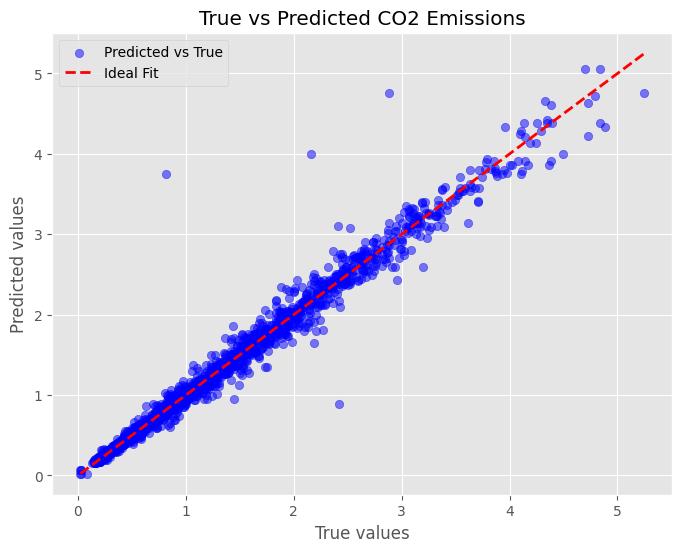

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True vs Predicted CO2 Emissions')
plt.legend() 
plt.show()

### LINEAR REGRESSION

In [46]:
# initialize the logistic regression model
LR = LinearRegression()

# start tracking the CPU usage and time
cpu_percentage = []
start_time = time.time()

# creating a function to track the average cpu
def cpu_tracker(interval=0.1):
    while True:
        cpu_percentage.append(psutil.cpu_percent(interval=interval))
        
# start CPU tracking in a separate thread
tracker_thread = threading.Thread(target=cpu_tracker)
tracker_thread.start()

# fit and train the model
LR.fit(X_train, y_train)

# end the time tracker
end_time = time.time()

# stop CPU tracking
tracker_thread.join(timeout=0)

# calculate time taken and average CPU usage
training_time = end_time - start_time
average_CPU_usage = sum(cpu_percentage) / len(cpu_percentage) if cpu_percentage else 0

In [47]:
print(f"Time taken to train the model: {training_time:.2f} seconds")
print(f"Average CPU usage during training: {average_CPU_usage:.2f}%")

Time taken to train the model: 0.05 seconds
Average CPU usage during training: 0.00%


In [48]:
# evaluate the model predictions
y_pred = LR.predict(X_test)

# evaluate the model accuracy
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"R2 score: {r2:.2f}")

Mean squared error: 0.03
Mean absolute error: 0.08
R2 score: 0.89


#### VISUALIZATION OF RESULTS

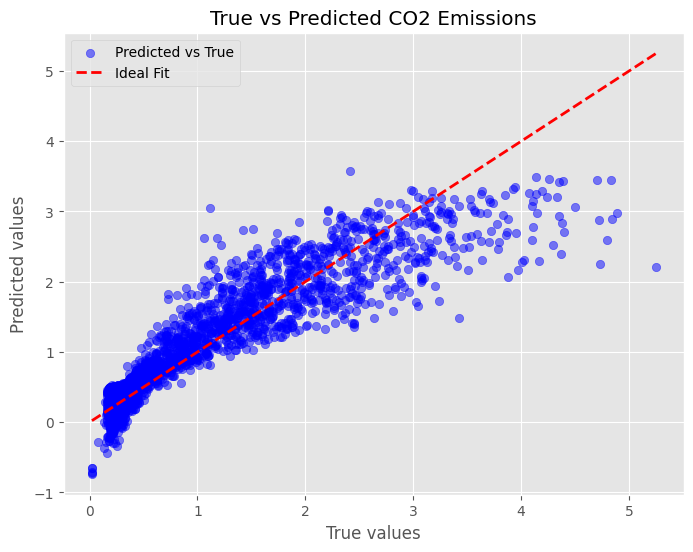

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True vs Predicted CO2 Emissions')
plt.legend() 
plt.show()

## RANDOM FOREST REGRESSOR

In [50]:
rf_model = RandomForestRegressor()

# start tracking the CPU usage and time
cpu_percentage = []
start_time = time.time()

# creating a function to track the average cpu
def cpu_tracker(interval=0.1):
    while True:
        cpu_percentage.append(psutil.cpu_percent(interval=interval))
        
# start CPU tracking in a separate thread
tracker_thread = threading.Thread(target=cpu_tracker)
tracker_thread.start()

rf_model.fit(X_train, y_train)

# end the time tracker
end_time = time.time()

# stop CPU tracking
tracker_thread.join(timeout=0)

# calculate time taken and average CPU usage
training_time = end_time - start_time
average_CPU_usage = sum(cpu_percentage) / len(cpu_percentage) if cpu_percentage else 0

In [51]:
print(f"Time taken to train the model: {training_time:.2f} seconds")
print(f"Average CPU usage during training: {average_CPU_usage:.2f}%")

Time taken to train the model: 102.47 seconds
Average CPU usage during training: 41.11%


In [52]:
# evaluate the model predictions
y_pred = rf_model.predict(X_test)

# evaluate the model accuracy
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"R2 score: {r2:.2f}")

Mean squared error: 0.00
Mean absolute error: 0.01
R2 score: 1.00


#### VISUALIZATION OF RESULTS

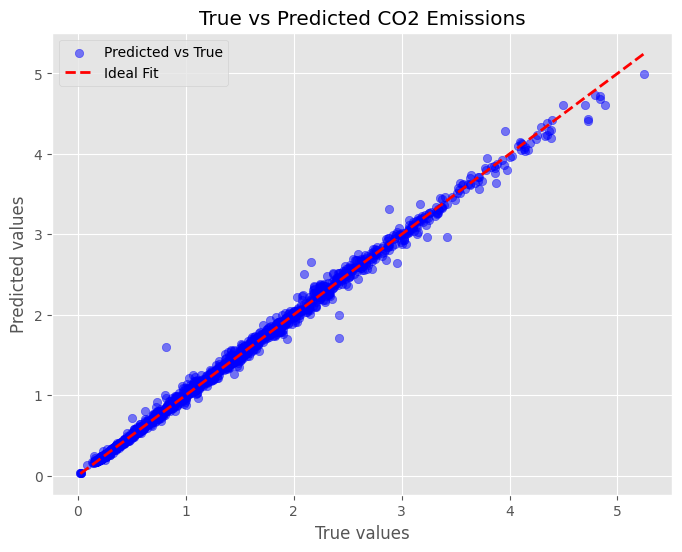

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True vs Predicted CO2 Emissions')
plt.legend() 
plt.show()

## INTRODUCING THE RIDGE (L2) REGULARIZATION TO CHECK OVERFITTING

Regularization helps model generalize better by constraining them from fitting exactly to the training data. Generally, simpler models prevent overfitting just like the linear regression above.

In [54]:
from sklearn.linear_model import Ridge

In [55]:
rid = Ridge(alpha=1.0)

# start tracking the CPU usage and time
cpu_percentage = []
start_time = time.time()

# creating a function to track the average cpu
def cpu_tracker(interval=0.1):
    while True:
        cpu_percentage.append(psutil.cpu_percent(interval=interval))
        
# start CPU tracking in a separate thread
tracker_thread = threading.Thread(target=cpu_tracker)
tracker_thread.start()

rid.fit(X_train, y_train)

# end the time tracker
end_time = time.time()

# stop CPU tracking
tracker_thread.join(timeout=0)

# calculate time taken and average CPU usage
training_time = end_time - start_time
average_CPU_usage = sum(cpu_percentage) / len(cpu_percentage) if cpu_percentage else 0

In [56]:
print(f"Time taken to train the model: {training_time:.2f} seconds")
print(f"Average CPU usage during training: {average_CPU_usage:.2f}%")

Time taken to train the model: 0.01 seconds
Average CPU usage during training: 0.00%


In [57]:
# evaluate the model predictions
y_pred = rid.predict(X_test)

# evaluate the model accuracy
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"R2 score: {r2:.2f}")

Mean squared error: 0.11
Mean absolute error: 0.18
R2 score: 0.63


#### VISUALIZATION OF RESULT

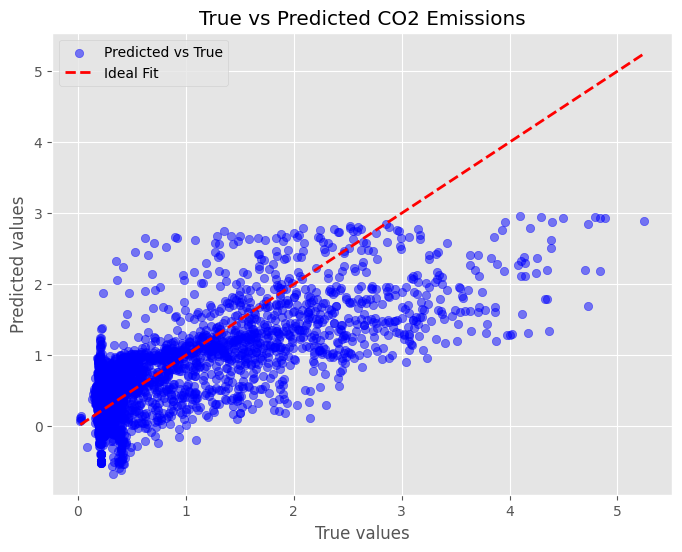

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True vs Predicted CO2 Emissions')
plt.legend() 
plt.show()

# ARTIFICIAL NEURAL NETWORK

In [59]:
import tensorflow as tf # importing the neural network framework with alias tf
from tensorflow.keras.models import Sequential # activating the linear layers of the neural network
from tensorflow.keras.layers import Dense # activating the dense and fully connected layer of the neural network
from tensorflow.keras import layers

In [60]:
# define the neural netwrok model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation = 'relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1) # output layer for regression
])

In [61]:
# model compilation
model.compile(optimizer='adam',
             loss='mse',
             metrics=['mse'])

In [62]:
# start tracking the CPU usage and time
cpu_percentage = []
start_time = time.time()

# creating a function to track the average cpu
def cpu_tracker(interval=0.1):
    while True:
        cpu_percentage.append(psutil.cpu_percent(interval=interval))
        
# start CPU tracking in a separate thread
tracker_thread = threading.Thread(target=cpu_tracker)
tracker_thread.start()

# train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# end the time tracker
end_time = time.time()

# stop CPU tracking
tracker_thread.join(timeout=0)

Epoch 1/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1730 - mse: 0.1730 - val_loss: 0.0570 - val_mse: 0.0570
Epoch 2/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 3/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0332 - mse: 0.0332 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 4/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 5/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 6/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 7/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 8/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 9/10
1134/1134 ━━━━━━━━━━━━━━━━━━━

In [63]:
# calculate time taken and average CPU usage
training_time = end_time - start_time
average_CPU_usage = sum(cpu_percentage) / len(cpu_percentage) if cpu_percentage else 0

In [64]:
print(f"Time taken to train the model: {training_time:.2f} seconds")
print(f"Average CPU usage during training: {average_CPU_usage:.2f}%")

Time taken to train the model: 30.84 seconds
Average CPU usage during training: 52.11%


#### VISUALIZE TRAIN MSE AND LOSS PROGRESS

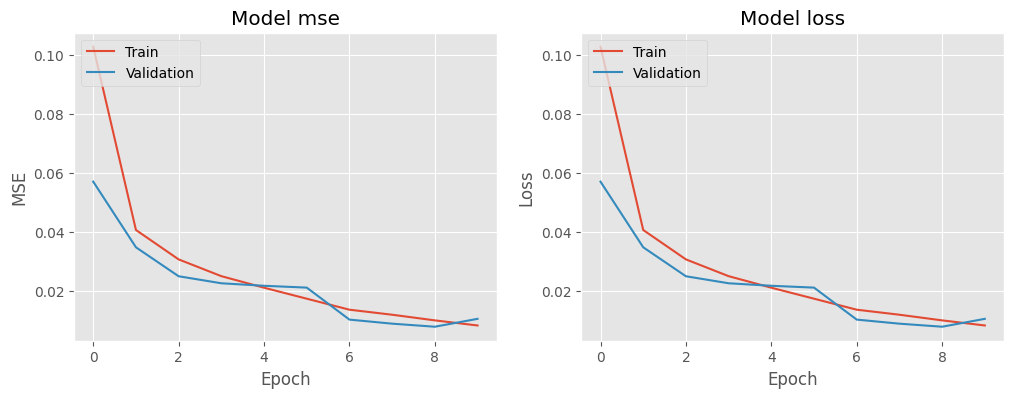

In [65]:
# plot training and validation mse
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

#### EVALUATE ANN PERFORMANCE

In [66]:
# evaluate the model predictions
y_pred = model.predict(X_test)

# evaluate the model accuracy
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"R2 score: {r2:.2f}")

378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean squared error: 0.01
Mean absolute error: 0.05
R2 score: 0.96


#### CONFIRMATION VISUALIZATION OF ANN MODEL PERFORMANCE

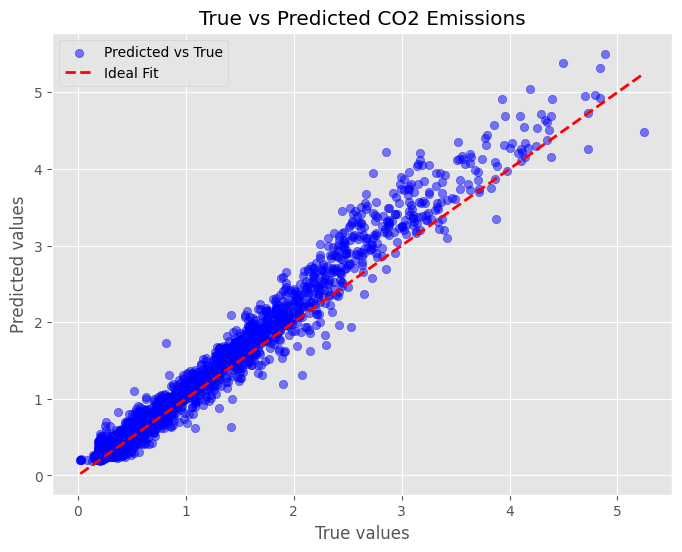

In [67]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True vs Predicted CO2 Emissions')
plt.legend() 
plt.show()

# CONVOLUTIONAL NEURAL NETWORK

In [78]:
# splits the data into dependent and independent variables
X = data.drop("fuel_consumption", axis = 1) #independent columns
y = data["fuel_consumption"] #target

num_classes = len(np.unique(y))

# splits the data into train sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=46)

# splits the data into test and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=46)

# scaling the faetures
scaler = Normalizer(norm='l2')

# fit the scaler to the train data
X_train = scaler.fit_transform(X_train)

# fit the scaler to the test data
X_test = scaler.transform(X_test)

# fit the scaler to the validation data
X_val = scaler.transform(X_val)

In [79]:
num_features = X.shape[1]

In [80]:
# write model architecture
model = Sequential([
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', 
                  input_shape=(num_features, 1)),
    
    layers.MaxPool1D(pool_size=2),
    
    layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    
    layers.MaxPool1D(pool_size=2),
    
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    
    layers.Dense(1) # output layer for regression
])

In [81]:
# compile the model and optimizer
model.compile(optimizer='adam',
              loss='mse', 
              metrics=['mse'])

In [82]:
# start tracking the CPU usage and time
cpu_percentage = []
start_time = time.time()

# creating a function to track the average cpu
def cpu_tracker(interval=0.1):
    while True:
        cpu_percentage.append(psutil.cpu_percent(interval=interval))
        
# start CPU tracking in a separate thread
tracker_thread = threading.Thread(target=cpu_tracker)
tracker_thread.start()

# train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# end the time tracker
end_time = time.time()

# stop CPU tracking
tracker_thread.join(timeout=0)

Epoch 1/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2357 - mse: 0.2357 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 2/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 3/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 4/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 5/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 6/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 7/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 8/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 9/10
1134/1134 ━━━━━━━━━━━━━━━━━━━

In [83]:
# calculate time taken and average CPU usage
training_time = end_time - start_time
average_CPU_usage = sum(cpu_percentage) / len(cpu_percentage) if cpu_percentage else 0

In [84]:
print(f"Time taken to train the model: {training_time:.2f} seconds")
print(f"Average CPU usage during training: {average_CPU_usage:.2f}%")

Time taken to train the model: 49.89 seconds
Average CPU usage during training: 60.93%


#### VISUALIZE TRAIN MSE AND LOSS PROGRESS

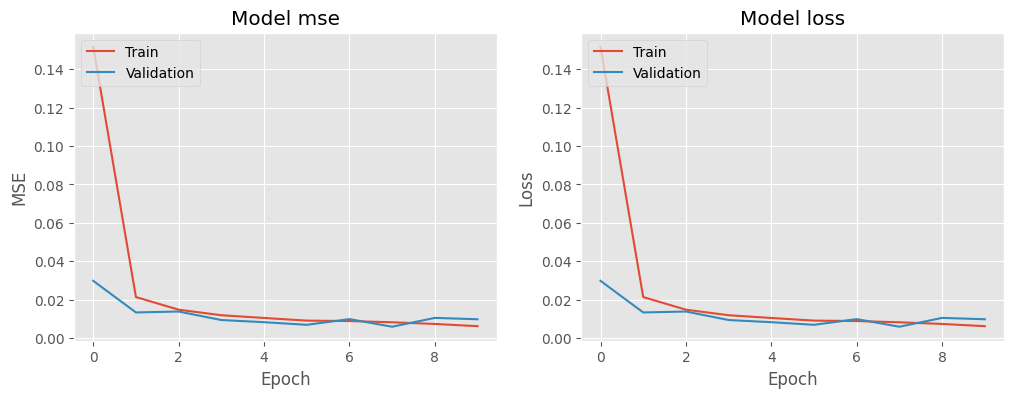

In [85]:
# plot training and validation mse
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

#### EVALUATE CNN PERFORMANCE

In [86]:
# evaluate the model predictions
y_pred = model.predict(X_test)

# evaluate the model accuracy
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"R2 score: {r2:.2f}")

378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Mean squared error: 0.01
Mean absolute error: 0.05
R2 score: 0.97


#### CONFIRMATION VISUALIZATION OF CNN MODEL PERFORMANCE

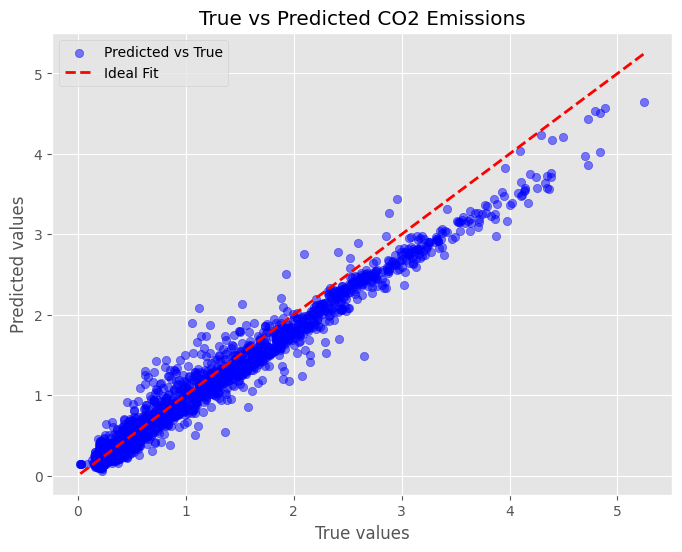

In [87]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True vs Predicted CO2 Emissions')
plt.legend() 
plt.show()